In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
!ls ../out

1_moreout.out  3_moreout.out  output_aCM.csv   output_SLATM.csv
2_moreout.out  4_moreout.out  output_FCHL.csv  output_SOAP.csv


In [4]:
fchl_out = pd.read_csv("../out/output_FCHL.csv", index_col=0)

In [5]:
fchl_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments
0,1,"['qm7_6123', 'qm7_51']","[[], [6, 6]]",18153.0,38153.0,"[[(1, 1), (2, 2), (3, 3), (5, 4), (6, 5), (7, ..."
1,2,"['qm7_51', 'qm7_6123']","[[6, 6], []]",18153.0,38153.0,"[[(2, 7), (3, 8)], [(1, 1), (2, 2), (3, 3), (5..."
2,3,"['qm7_51', 'qm7_6232']","[[6, 6], []]",22916.0,42916.0,"[[(2, 7), (3, 8)], [(1, 1), (2, 2), (3, 3), (5..."
3,4,"['qm7_6123', 'qm7_51']","[[], [6, 6]]",25365.0,45365.0,"[[(1, 1), (2, 2), (4, 3), (5, 4), (6, 5), (7, ..."
4,5,"['qm7_86', 'qm7_6123']","[[6, 6], [6]]",17417.0,47417.0,"[[(1, 7), (5, 8), (4, 9)], [(1, 1), (2, 2), (3..."
...,...,...,...,...,...,...
995,996,"['qm7_0', 'qm7_4758', 'qm7_0', 'qm7_47']","[[], [6, 6], [], [6, 6]]",60341.0,100341.0,"[[(1, 9)], [(7, 1), (6, 2), (3, 4), (4, 5), (5..."
996,997,"['qm7_990', 'qm7_5265']","[[6, 6], [6, 6]]",60355.0,100355.0,"[[(6, 5), (5, 6), (4, 8), (3, 9)], [(5, 1), (1..."
997,998,"['qm7_918', 'qm7_6045']","[[6], [6, 6, 6]]",60359.0,100359.0,"[[(4, 1), (2, 2), (3, 5), (1, 7), (6, 9)], [(2..."
998,999,"['qm7_1055', 'qm7_0', 'qm7_6315']","[[6, 6, 6, 6], [], [6]]",50360.0,100360.0,"[[(2, 4), (3, 7)], [(1, 2)], [(3, 1), (5, 3), ..."


In [6]:
from ast import literal_eval 

In [7]:
fchl_out["Fragments"] = fchl_out["Fragments"].apply(literal_eval)

In [8]:
fchl_out["Sorted Fragments"] = fchl_out["Fragments"].apply(lambda x:sorted(x))

In [9]:
len(np.unique(fchl_out["Sorted Fragments"]))

837

In [58]:
# excess is missing Hs - to fix 

In [10]:
import qml

In [11]:
qm9_mol = qml.Compound("../targets/qm9_0.xyz")
qm9_ncharges = qm9_mol.nuclear_charges

In [12]:
qm9_ncharges

array([8, 6, 6, 7, 6, 8, 8, 7, 6, 1, 1])

In [13]:
def count_ncharges(list_ncharges, elements=[1,6,7,8,16]):
    ncharge_count = np.zeros(len(elements))
    for ncharge in list_ncharges:
        for i, elem in enumerate(elements):
            if ncharge == elem:
                ncharge_count[i] += 1
    return ncharge_count

In [14]:
qm9_counts = count_ncharges(qm9_ncharges)

In [15]:
qm9_counts

array([2., 4., 2., 3., 0.])

In [16]:
def get_excess_frags(frag_list):
    mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    excess = [[ncharge]*int(count) for ncharge, count in zip([1,6,7,8,16], diff_count)]
    return np.concatenate(excess)

In [17]:
get_excess_frags(['qm7_1107', 'qm7_5455'])

array([1., 1., 1., 1., 1., 1., 1., 1., 6., 6., 6., 6.])

In [18]:
fchl_out["Excess"] = fchl_out["Fragments"].apply(get_excess_frags)

In [19]:
fchl_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments
0,1,"[qm7_6123, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",18153.0,38153.0,"[[(1, 1), (2, 2), (3, 3), (5, 4), (6, 5), (7, ...","[qm7_51, qm7_6123]"
1,2,"[qm7_51, qm7_6123]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",18153.0,38153.0,"[[(2, 7), (3, 8)], [(1, 1), (2, 2), (3, 3), (5...","[qm7_51, qm7_6123]"
2,3,"[qm7_51, qm7_6232]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",22916.0,42916.0,"[[(2, 7), (3, 8)], [(1, 1), (2, 2), (3, 3), (5...","[qm7_51, qm7_6232]"
3,4,"[qm7_6123, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",25365.0,45365.0,"[[(1, 1), (2, 2), (4, 3), (5, 4), (6, 5), (7, ...","[qm7_51, qm7_6123]"
4,5,"[qm7_86, qm7_6123]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0]",17417.0,47417.0,"[[(1, 7), (5, 8), (4, 9)], [(1, 1), (2, 2), (3...","[qm7_6123, qm7_86]"
...,...,...,...,...,...,...,...
995,996,"[qm7_0, qm7_4758, qm7_0, qm7_47]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",60341.0,100341.0,"[[(1, 9)], [(7, 1), (6, 2), (3, 4), (4, 5), (5...","[qm7_0, qm7_0, qm7_47, qm7_4758]"
996,997,"[qm7_990, qm7_5265]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",60355.0,100355.0,"[[(6, 5), (5, 6), (4, 8), (3, 9)], [(5, 1), (1...","[qm7_5265, qm7_990]"
997,998,"[qm7_918, qm7_6045]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, ...",60359.0,100359.0,"[[(4, 1), (2, 2), (3, 5), (1, 7), (6, 9)], [(2...","[qm7_6045, qm7_918]"
998,999,"[qm7_1055, qm7_0, qm7_6315]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",50360.0,100360.0,"[[(2, 4), (3, 7)], [(1, 2)], [(3, 1), (5, 3), ...","[qm7_0, qm7_1055, qm7_6315]"


In [20]:
# get energies
# qm7 energies are in qm7 dir 
# need qm9 energies and excess contribution

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# need ncharges list and list of energies

In [23]:
import qml

In [24]:
qm7 = pd.read_csv("../qm7/energies.csv", index_col=0)
files = qm7["file"].to_list()

In [25]:
mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in files]

In [26]:
ncharges = [mol.nuclear_charges for mol in mols]

In [27]:
# ncharges convert to count
elements = [1, 6, 7, 8, 16]
ncharge_counts = []
for ncharge_list in ncharges: 
    ncharge_count = count_ncharges(ncharge_list)
    ncharge_counts.append(ncharge_count)

In [28]:
energies = qm7["energy / Ha"].to_list()

In [29]:
reg = LinearRegression().fit(ncharge_counts, energies)

In [30]:
reg.score(ncharge_counts, energies)

0.9999998316921461

In [31]:
coeff_energies = reg.coef_

In [32]:
coeff_energies

array([  -0.61002842,  -38.01906467,  -54.64773278,  -75.09076869,
       -397.94238855])

In [33]:
coeff_energies = dict(zip(elements, coeff_energies))

In [34]:
def match_file_to_energy(filename):
    energies = pd.read_csv("../qm7/energies.csv")
    energy = energies.loc[energies["file"] == filename]["energy / Ha"]
    return float(energy)

In [35]:
def get_excess_energy(excess_ncharges):
    energy = np.sum([coeff_energies[x] for x in excess_ncharges])
    return energy

In [36]:
def get_reaction_energy(fragment_list, excess_ncharges):
    qm9_energy = -487.817450280942 # Ha
    
    excess_energy = get_excess_energy(excess_ncharges)
    
    frag_energies = np.sum([match_file_to_energy(x) for x in fragment_list])
    
    rxn_energy = frag_energies - qm9_energy - excess_energy
    return rxn_energy

In [37]:
fchl_out["energies / Ha"] = fchl_out.apply(lambda x: get_reaction_energy(x["Fragments"], x["Excess"]), axis=1)

In [38]:
fchl_out["energies / kcal/mol"] = fchl_out["energies / Ha"] * 627.5

In [39]:
fchl_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,energies / Ha,energies / kcal/mol
0,1,"[qm7_6123, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",18153.0,38153.0,"[[(1, 1), (2, 2), (3, 3), (5, 4), (6, 5), (7, ...","[qm7_51, qm7_6123]",0.103677,65.057569
1,2,"[qm7_51, qm7_6123]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",18153.0,38153.0,"[[(2, 7), (3, 8)], [(1, 1), (2, 2), (3, 3), (5...","[qm7_51, qm7_6123]",0.103677,65.057569
2,3,"[qm7_51, qm7_6232]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",22916.0,42916.0,"[[(2, 7), (3, 8)], [(1, 1), (2, 2), (3, 3), (5...","[qm7_51, qm7_6232]",0.066004,41.417359
3,4,"[qm7_6123, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",25365.0,45365.0,"[[(1, 1), (2, 2), (4, 3), (5, 4), (6, 5), (7, ...","[qm7_51, qm7_6123]",0.103677,65.057569
4,5,"[qm7_86, qm7_6123]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0]",17417.0,47417.0,"[[(1, 7), (5, 8), (4, 9)], [(1, 1), (2, 2), (3...","[qm7_6123, qm7_86]",0.045238,28.386946
...,...,...,...,...,...,...,...,...,...
995,996,"[qm7_0, qm7_4758, qm7_0, qm7_47]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",60341.0,100341.0,"[[(1, 9)], [(7, 1), (6, 2), (3, 4), (4, 5), (5...","[qm7_0, qm7_0, qm7_47, qm7_4758]",0.102053,64.038260
996,997,"[qm7_990, qm7_5265]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",60355.0,100355.0,"[[(6, 5), (5, 6), (4, 8), (3, 9)], [(5, 1), (1...","[qm7_5265, qm7_990]",0.129030,80.966274
997,998,"[qm7_918, qm7_6045]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 6.0, ...",60359.0,100359.0,"[[(4, 1), (2, 2), (3, 5), (1, 7), (6, 9)], [(2...","[qm7_6045, qm7_918]",0.031947,20.046845
998,999,"[qm7_1055, qm7_0, qm7_6315]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",50360.0,100360.0,"[[(2, 4), (3, 7)], [(1, 2)], [(3, 1), (5, 3), ...","[qm7_0, qm7_1055, qm7_6315]",0.184290,115.642176


In [48]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

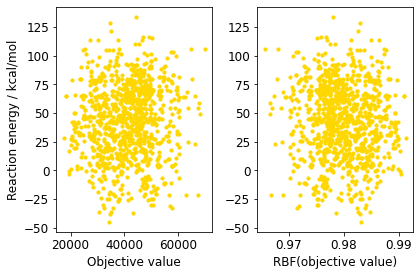

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(fchl_out["ObjValNoPen"], fchl_out["energies / kcal/mol"], s=10, color='gold')
ax[0].set_xlabel("Objective value")
ax[0].set_ylabel("Reaction energy / kcal/mol")

x = np.exp(-fchl_out["ObjValNoPen"]/(2*1000**2))
ax[1].scatter(x, fchl_out["energies / kcal/mol"], s=10, color='gold')
ax[1].set_xlabel("RBF(objective value)")

plt.tight_layout()
plt.savefig("../figures/correlation-fchl.png", dpi=300)
plt.show()